<a href="https://colab.research.google.com/github/mark1234690/tibame0315/blob/main/Optimizers_%E9%80%B2%E9%9A%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例目標:
推導 優化器: Adam, 了解其原理與優化過程

# 範例重點:

提供 AdamOptimizer 的範例, 可以讓學員驗證 m, v與  β的變化關係


# 以下的片段範例需要有 ffmpeg

請務必使用 conda 指令安裝

務必確認HDD 有足夠的空間

>conda install -c conda-forge 
>conda install ffmpeg

> NOTE: 必須在執行此一範例前先行安裝

In [ ]:
import sys
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [ ]:
!pip install autograd
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad,value_and_grad,grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest


# Objective function: the Beale function

In [ ]:
# Objective function: the Beale function

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)
minima = np.array([3., .5])
f(*minima)

0.0

In [ ]:

minima_ = minima.reshape(-1, 1)
minima_

f(*minima_)

array([0.])

In [ ]:
def target_func(weights):
    x,y = weights
    return f(x,y)

# Adam Optimizer

In [ ]:
class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)

    def minimize_trace(self, path=[]):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))

In [ ]:
EPOCHS = 1500
SHOW_STEPS = 100
PRECISION = 1e-8
weights = np.array([1., 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr=0.05)
print("start to optimize EPOCHS:{}".format(EPOCHS))
progress_step = EPOCHS // SHOW_STEPS

for i in range(EPOCHS):
    if i % progress_step == 0:
        loss_value = adam.loss(adam.theta)
        print("times:{} weights:{} loss:{}".format(i, adam.theta, loss_value))
        if loss_value < PRECISION:
            print("loss:{} is less than precision:{}, finish!".format(loss_value, PRECISION))
            break
    adam.minimize_trace(path_trace)
print("\nfinal weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))

start to optimize EPOCHS:1500
times:0 weights:[1.  1.5] loss:41.25
times:15 weights:[0.44382626 0.87835191] loss:12.86735781039862
times:30 weights:[0.49356784 0.55886817] loss:10.212262338981635
times:45 weights:[0.92553432 0.3596197 ] loss:5.945150686360288
times:60 weights:[1.43641764 0.19793976] loss:2.317031240145094
times:75 weights:[1.84395098 0.10159372] loss:0.81828442342038
times:90 weights:[2.0840825  0.08980471] loss:0.48516267307802263
times:105 weights:[2.19626573 0.13738402] loss:0.3534464307150955
times:120 weights:[2.25653455 0.2015673 ] loss:0.24799424584696347
times:135 weights:[2.313173   0.25325785] loss:0.18102464464704043
times:150 weights:[2.37538725 0.28707025] loss:0.1359061231943287
times:165 weights:[2.4351359  0.31112137] loss:0.10334279870852761
times:180 weights:[2.48696203 0.33215811] loss:0.07981042203610088
times:195 weights:[2.53180866 0.3510811 ] loss:0.06245512050603173
times:210 weights:[2.57198811 0.36709143] loss:0.04943403274547287
times:225 wei

In [ ]:
print("-------------")
path_trace = np.array(path_trace).T
shape = path_trace.shape
if shape[1] > SHOW_STEPS:
    show_step = shape[1] // SHOW_STEPS
    path_trace = np.array(path_trace[:,::show_step])
print(path_trace)

-------------
[[1.         0.5083683  0.40772915 0.6401297  1.02892232 1.43641764
  1.77552387 2.00733006 2.13996662 2.21029365 2.25653455 2.30127513
  2.35026186 2.40006063 2.44617238 2.48696203 2.52326762 2.55639275
  2.58697385 2.61514372 2.64103222 2.66489805 2.68699436 2.70749634
  2.7265406  2.74425915 2.76077251 2.77618235 2.79057736 2.80403783
  2.81663549 2.82843415 2.83949134 2.84985915 2.85958475 2.8687111
  2.87727742 2.88531967 2.89287088 2.89996152 2.90661971 2.91287154
  2.91874123 2.92425132 2.92942283 2.93427541 2.93882747 2.94309626
  2.94709798 2.95084788 2.95436032 2.95764882 2.96072616 2.96360442
  2.96629501 2.96880871 2.97115577 2.97334585 2.97538814 2.97729133
  2.97906367 2.98071298 2.98224666 2.98367175 2.98499492 2.98622247
  2.98736041 2.98841439 2.9893898  2.9902917  2.99112492 2.991894
  2.99260323 2.99325668 2.99385816 2.9944113  2.99491948 2.99538592
  2.99581362 2.99620541 2.99656395 2.99689172 2.99719106 2.99746416
  2.99771305 2.99793965 2.99814572 2.

# Visualize Convergence Trace

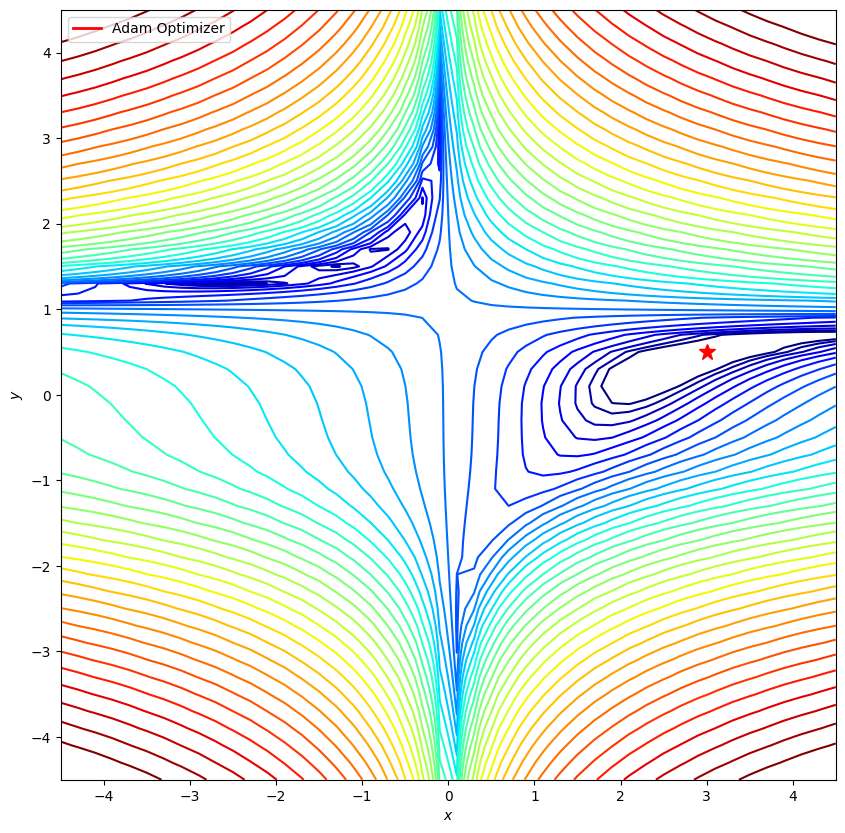

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=12)

line, = ax.plot([], [], 'r', label='Adam Optimizer', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [ ]:
import matplotlib.animation as manimation; manimation.writers.list()

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path_trace[::,:i])
    point.set_data(*path_trace[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path_trace.shape[1], interval=60, 
                               repeat_delay=5, blit=True)
HTML(anim.to_html5_video())